In [3]:
# Load libraries
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Set options for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [4]:
# Read dataset using the DATA_PATH from .env
data_path = os.getenv("DATA_PATH")
df = pd.read_csv(data_path)

print(f"✅ Dataset loaded successfully: {data_path}")
print(f"Shape: {df.shape}")
df.head()

✅ Dataset loaded successfully: /Users/mickey/customer_purchase_behaviour/data/raw/dataset.csv
Shape: (3900, 18)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Overview of data
df.info()

# Quick stats for numeric columns
df.describe(include=[np.number])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [6]:
# Count missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

# Check duplicates
duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicates}")

Missing values per column:
 Series([], dtype: int64)

Total duplicate rows: 0


In [7]:
print("Column Names:\n", df.columns.tolist())

# Check a few unique values per column to understand data variety
for col in df.columns[:5]:
    print(f"\n{col} -> {df[col].unique()[:5]}")

Column Names:
 ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']

Customer ID -> [1 2 3 4 5]

Age -> [55 19 50 21 45]

Gender -> ['Male' 'Female']

Item Purchased -> ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers']

Category -> ['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [8]:
# Standardize column names to snake_case (lowercase with underscores)
df.columns = (
    df.columns
    .str.strip()              # remove extra spaces
    .str.lower()              # convert to lowercase
    .str.replace(' ', '_')    # replace spaces with underscores
    .str.replace(r'[^a-z0-9_]', '', regex=True)  # remove special chars
)

print("✅ Column names standardized:")
print(df.columns.tolist())

✅ Column names standardized:
['customer_id', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount_usd', 'location', 'size', 'color', 'season', 'review_rating', 'subscription_status', 'shipping_type', 'discount_applied', 'promo_code_used', 'previous_purchases', 'payment_method', 'frequency_of_purchases']


In [9]:
# Strip whitespace from string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

print("✅ String columns trimmed for whitespace.")

✅ String columns trimmed for whitespace.


In [10]:
# Ensure purchase_amount_usd is numeric and non-negative
df['purchase_amount_usd'] = pd.to_numeric(df['purchase_amount_usd'], errors='coerce')
invalid_rows = df[df['purchase_amount_usd'] < 0].shape[0]
df = df[df['purchase_amount_usd'] >= 0]

print(f"✅ Removed {invalid_rows} invalid rows with negative purchase amounts.")


✅ Removed 0 invalid rows with negative purchase amounts.


In [11]:
# Ensure numeric types for proper analysis
df['age'] = df['age'].astype(int)
df['previous_purchases'] = df['previous_purchases'].astype(int)
df['review_rating'] = df['review_rating'].astype(float)

print("✅ Converted age, previous_purchases, and review_rating to numeric.")

✅ Converted age, previous_purchases, and review_rating to numeric.


In [12]:
# Save cleaned data for future use
cleaned_path = "/Users/mickey/customer_purchase_behaviour/data/processed/cleaned_customer_purchase.csv"
df.to_csv(cleaned_path, index=False)

print(f"✅ Cleaned dataset saved to: {cleaned_path}")
print("Final shape:", df.shape)

✅ Cleaned dataset saved to: /Users/mickey/customer_purchase_behaviour/data/processed/cleaned_customer_purchase.csv
Final shape: (3900, 18)


In [13]:
# Verify everything looks fine
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount_usd     3900 non-null   int64  
 6   location                3900 non-null   object 
 7   size                    3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review_rating           3900 non-null   float64
 11  subscription_status     3900 non-null   object 
 12  shipping_type           3900 non-null   object 
 13  discount_applied        3900 non-null   object 
 14  promo_code_used         3900 non-null   

In [14]:
# Basic numeric summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,"3,900.00","1,950.50","1,125.98",1.00,975.75,"1,950.50","2,925.25","3,900.00"
age,"3,900.00",44.07,15.21,18.00,31.00,44.00,57.00,70.00
purchase_amount_usd,"3,900.00",59.76,23.69,20.00,39.00,60.00,81.00,100.00
review_rating,"3,900.00",3.75,0.72,2.50,3.10,3.70,4.40,5.00
previous_purchases,"3,900.00",25.35,14.45,1.00,13.00,25.00,38.00,50.00


/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/2496424741.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


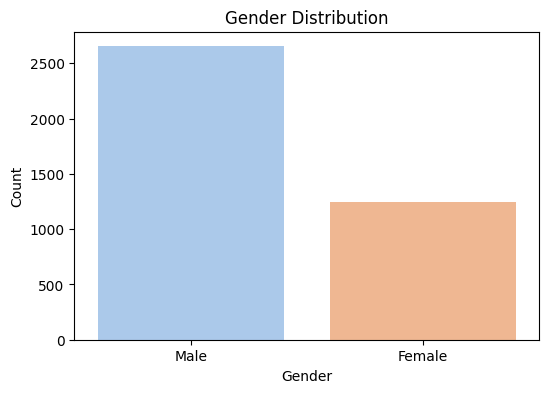

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

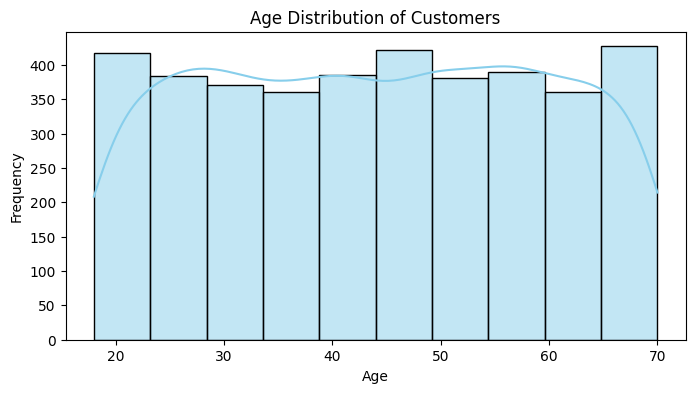

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

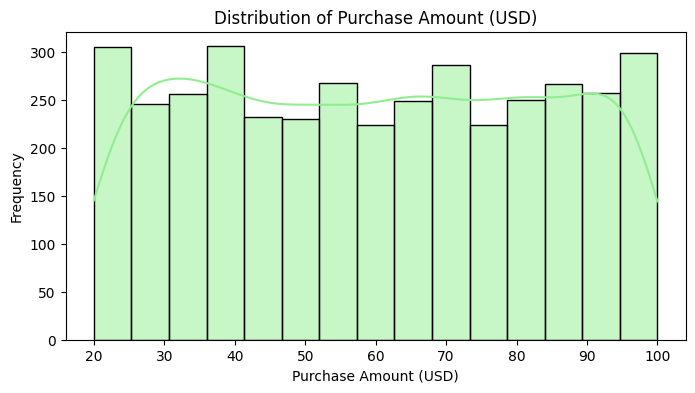

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['purchase_amount_usd'], bins=15, kde=True, color='lightgreen')
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/2123065785.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='muted')
/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/2123065785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='muted')


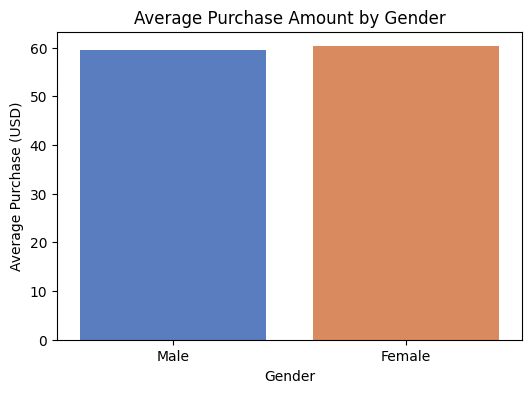

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='muted')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase (USD)')
plt.show()

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/891847013.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='cool')
/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/891847013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='cool')


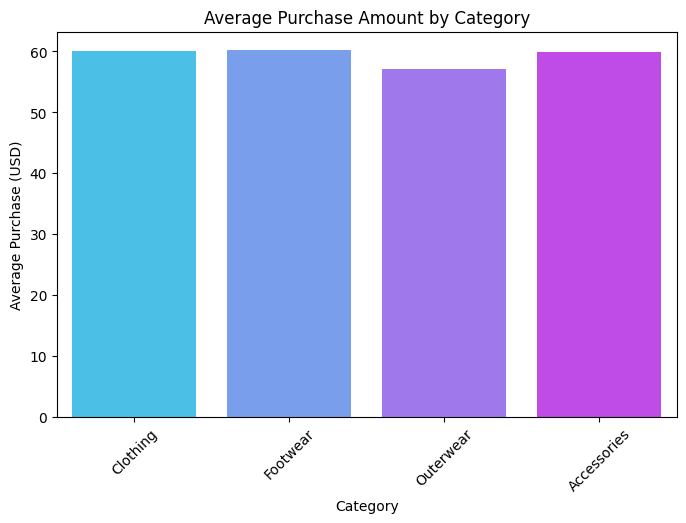

In [19]:
#avg purchase by category
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='cool')
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase (USD)')
plt.xticks(rotation=45)
plt.show()

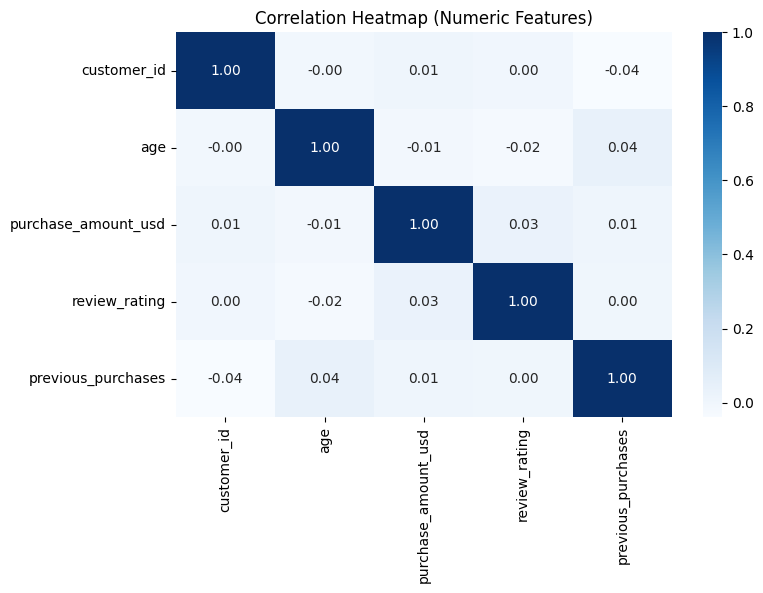

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/3789332774.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='review_rating', data=df, ci=None, palette='mako')
/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/3789332774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='review_rating', data=df, ci=None, palette='mako')


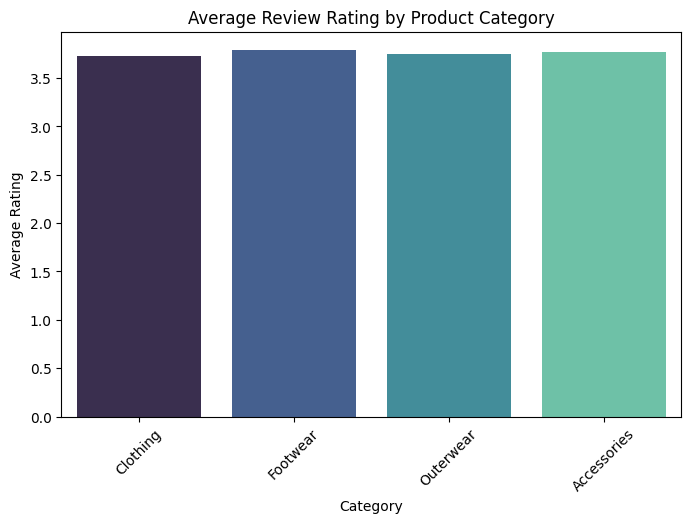

In [21]:
#Avg review rating by category
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='review_rating', data=df, ci=None, palette='mako')
plt.title('Average Review Rating by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/2142065087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette='crest')


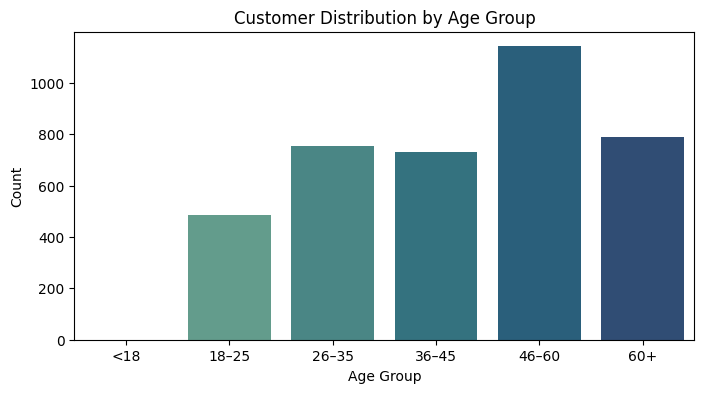

In [22]:
# Create age group bins
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18–25', '26–35', '36–45', '46–60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8,4))
sns.countplot(x='age_group', data=df, palette='crest')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/3292458339.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spend_tier', data=df, palette='flare')


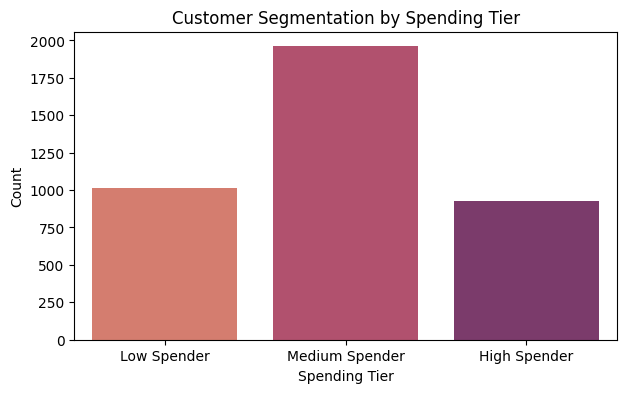

In [23]:
# Create spend tiers based on quartiles
spend_bins = [-1, df['purchase_amount_usd'].quantile(0.25),
              df['purchase_amount_usd'].quantile(0.75), df['purchase_amount_usd'].max()]
spend_labels = ['Low Spender', 'Medium Spender', 'High Spender']

df['spend_tier'] = pd.cut(df['purchase_amount_usd'], bins=spend_bins, labels=spend_labels)

plt.figure(figsize=(7,4))
sns.countplot(x='spend_tier', data=df, palette='flare')
plt.title('Customer Segmentation by Spending Tier')
plt.xlabel('Spending Tier')
plt.ylabel('Count')
plt.show()

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/2139243982.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='purchase_amount_usd', hue='spend_tier', data=df, ci=None, palette='viridis')


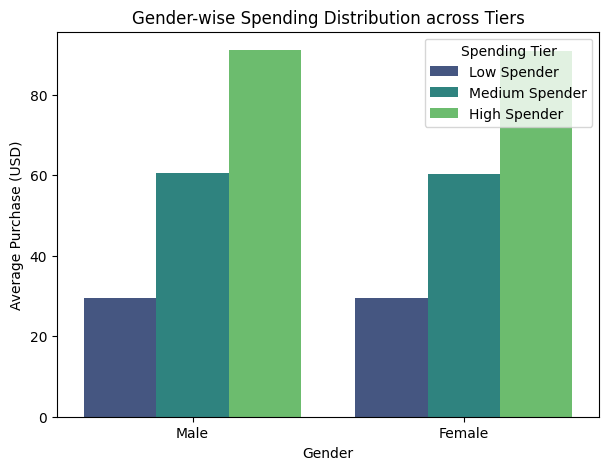

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(x='gender', y='purchase_amount_usd', hue='spend_tier', data=df, ci=None, palette='viridis')
plt.title('Gender-wise Spending Distribution across Tiers')
plt.xlabel('Gender')
plt.ylabel('Average Purchase (USD)')
plt.legend(title='Spending Tier')
plt.show()

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/2168803946.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='coolwarm')
/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/2168803946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='coolwarm')


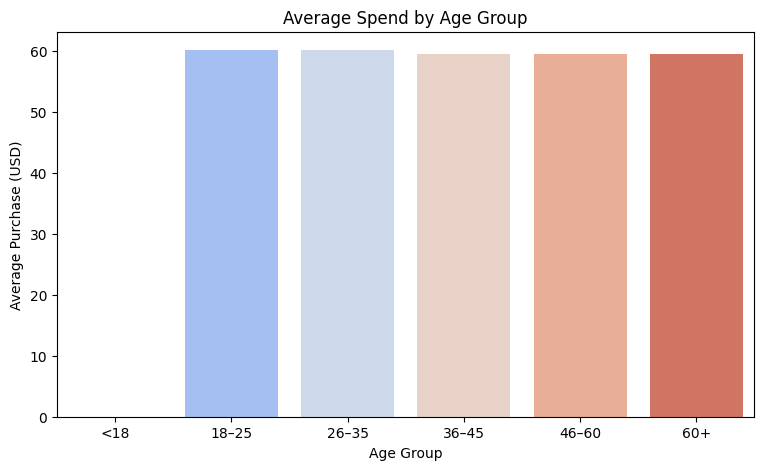

In [25]:
plt.figure(figsize=(9,5))
sns.barplot(x='age_group', y='purchase_amount_usd', data=df, estimator='mean', ci=None, palette='coolwarm')
plt.title('Average Spend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase (USD)')
plt.show()

In [26]:
segment_summary = df.groupby(['age_group', 'gender', 'spend_tier'])['purchase_amount_usd'].agg(['count', 'mean']).reset_index()
segment_summary.rename(columns={'count': 'num_customers', 'mean': 'avg_purchase'}, inplace=True)
segment_summary.head()

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/3753797876.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df.groupby(['age_group', 'gender', 'spend_tier'])['purchase_amount_usd'].agg(['count', 'mean']).reset_index()


,age_group,gender,spend_tier,num_customers,avg_purchase
0,<18,Female,Low Spender,0,NaN
1,<18,Female,Medium Spender,0,NaN
2,<18,Female,High Spender,0,NaN
3,<18,Male,Low Spender,0,NaN
4,<18,Male,Medium Spender,0,NaN


In [27]:
segment_summary = df.groupby(['age_group', 'gender', 'spend_tier'])['purchase_amount_usd'].agg(['count', 'mean']).reset_index()
segment_summary.rename(columns={'count': 'num_customers', 'mean': 'avg_purchase'}, inplace=True)

# Remove rows with zero customers or NaN averages
segment_summary = segment_summary[segment_summary['num_customers'] > 0]

segment_summary.head(10)

/var/folders/mm/910xb7n57bq21lhb_gss88540000gn/T/ipykernel_9651/1509779411.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df.groupby(['age_group', 'gender', 'spend_tier'])['purchase_amount_usd'].agg(['count', 'mean']).reset_index()


,age_group,gender,spend_tier,num_customers,avg_purchase
6,18–25,Female,Low Spender,42,29.76
7,18–25,Female,Medium Spender,74,62.46
8,18–25,Female,High Spender,36,91.89
9,18–25,Male,Low Spender,88,29.60
10,18–25,Male,Medium Spender,165,60.89
11,18–25,Male,High Spender,81,91.68
12,26–35,Female,Low Spender,49,29.51
13,26–35,Female,Medium Spender,127,60.13
14,26–35,Female,High Spender,65,90.62
15,26–35,Male,Low Spender,133,29.37


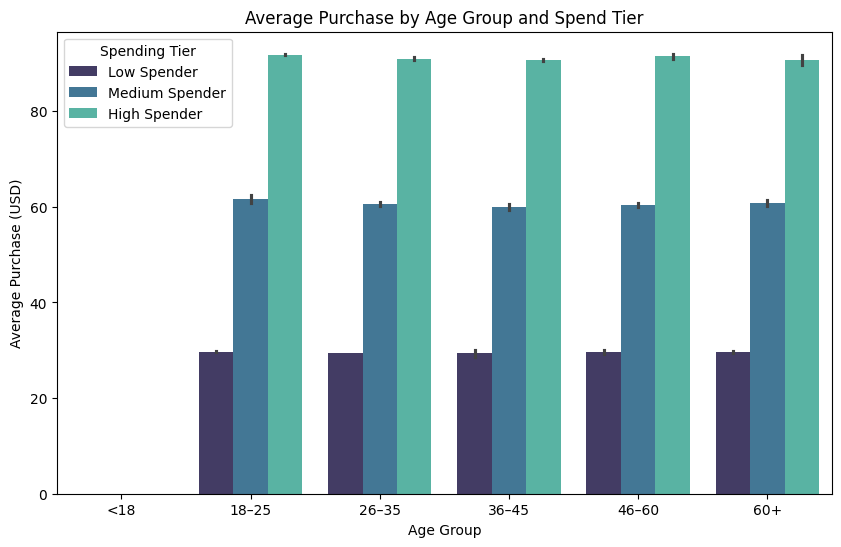

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='avg_purchase', hue='spend_tier', data=segment_summary, palette='mako')
plt.title('Average Purchase by Age Group and Spend Tier')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase (USD)')
plt.legend(title='Spending Tier')
plt.show()

In [30]:
final_path = "/Users/mickey/customer_purchase_behaviour/data/processed/final_customer_behaviour_dataset.csv"
df.to_csv(final_path, index=False)
print(f"✅ Final dataset saved to {final_path}")

✅ Final dataset saved to /Users/mickey/customer_purchase_behaviour/data/processed/final_customer_behaviour_dataset.csv
